## Import Libraries
We will start by importing the necessary libraries for this lab. We will use the scikit-learn library to generate the dataset and train the logistic regression models, and the matplotlib library to plot the decision boundary.
<br>
- numpy：數據處理
- matplotlib：視覺化
- sklearn.datasets：建立樣本資料
- sklearn.linear_model：Logistic Regression 模型
- sklearn.inspection：畫出決策邊界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

## Generate Dataset
We will generate a 3-class dataset using the make_blobs function from scikit-learn. <br>
We will use 1000 samples and set the centers of the blobs to be at [-5, 0], [0, 1.5], [5, -1]. <br>
We will then transform the dataset using a transformation matrix to make the dataset more difficult to classify.
<br>
### 2. 建立三類資料點 + 資料變形
- 使用 make_blobs 產生三群資料，代表三個類別
- 使用轉換矩陣扭曲資料分布，使分類難度提高

In [2]:
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

## Train Multinomial Logistic Regression Model
We will now train a multinomial logistic regression model using the LogisticRegression function from scikit-learn. <br>
We will set the solver to "sag", the maximum number of iterations to 100, the random state to 42, and the multi-class option to "multinomial". <br>
We will then print the training score of the model.
<br>
### 3. 訓練 Multinomial 模型
- 使用 `multi_class="multinomial"` 與 softmax
- 評估模型準確度 `clf.score(X, y)`

In [9]:
clf = LogisticRegression(solver="sag", max_iter=100, random_state=42).fit(X, y)

print("training score : %.3f (%s)" % (clf.score(X, y), "multinomial"))

training score : 0.995 (multinomial)


## Plot Decision Boundary of Multinomial Logistic Regression Model
We will now plot the decision surface of the multinomial logistic regression model using the DecisionBoundaryDisplay function from scikit-learn. <br>
We will set the response method to "predict", the colormap to "plt.cm.Paired", and plot the training points as well.
<br>
### 4. 繪製 Multinomial 決策邊界
- 使用 DecisionBoundaryDisplay 顯示預測區域
- 三類分界會較平滑，整體感較強

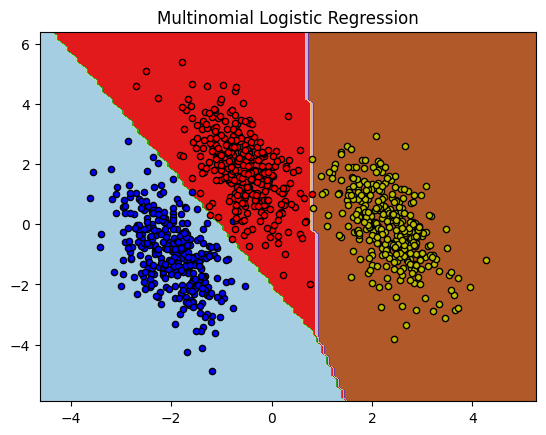

In [11]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Multinomial Logistic Regression")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor="black", s=20)

## Train One-vs-Rest Logistic Regression Model
We will now train a one-vs-rest logistic regression model using the same parameters as in Step 3, but with the multi-class option set to "ovr". <br>
We will then print the training score of the model.
<br>
### 5. 訓練 One-vs-Rest 模型
- 使用 `multi_class="ovr"`，分別訓練三個二分類器

In [13]:
clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42).fit(X, y)

print("training score : %.3f (%s)" % (clf.score(X, y), "ovr"))

training score : 0.995 (ovr)


## Plot Decision Boundary of One-vs-Rest Logistic Regression Model
We will now plot the decision surface of the one-vs-rest logistic regression model using the same parameters as in Step 4, but plot the hyperplanes corresponding to the three one-vs-rest classifiers as dashed lines.
<br>
### 6. 繪製 OvR 決策邊界 + 虛線超平面
- 顯示各類別對其他的分類邊界，會看到三條獨立的虛線

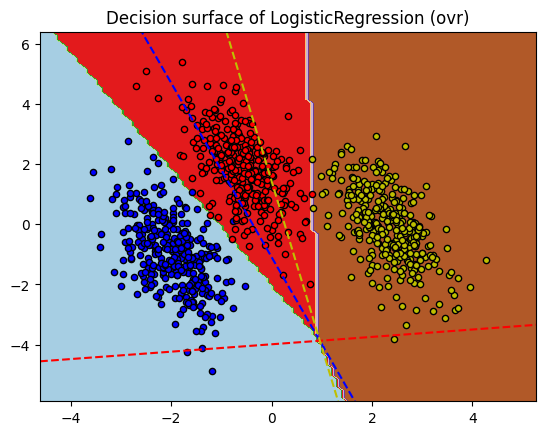

In [14]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Decision surface of LogisticRegression (ovr)")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color, edgecolor="black", s=20)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

## Visualize Plots
We will now visualize both plots side by side to compare the decision boundaries of the two models.

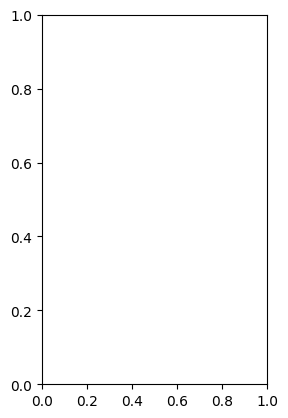

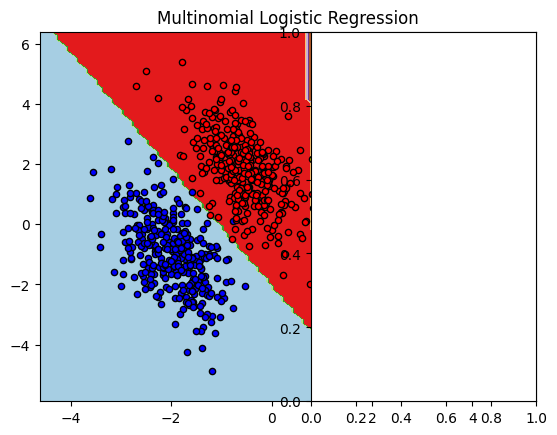

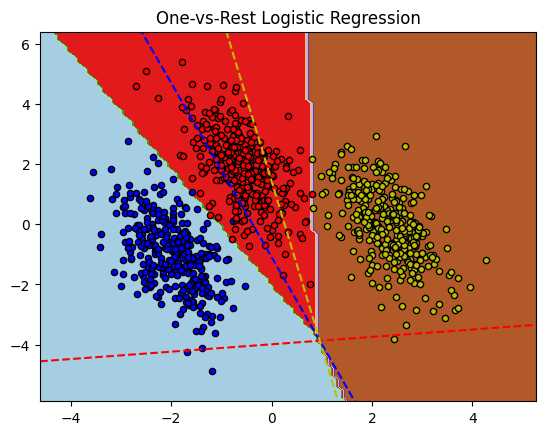

In [19]:
plt.subplot(1,2,1)
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Multinomial Logistic Regression")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], color=color, edgecolor="black", s=20
        )

plt.subplot(1,2,2)
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("One-vs-Rest Logistic Regression")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], color=color, edgecolor="black", s=20
        )

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.subplots_adjust(wspace=0.5)
plt.show()

## Summary
In this lab, we learned how to plot the decision surface of two logistic regression models, namely the multinomial logistic regression and the one-vs-rest logistic regression. We used a 3-class dataset and compared the performance of the two models by plotting their decision boundary. We observed that the multinomial logistic regression model had a smoother decision boundary, while the one-vs-rest logistic regression model had three separate decision boundaries for each class.

# Logistic Regression 多分類決策邊界分析與應用說明

## 概念解釋

### Logistic Regression 是什麼？
邏輯回歸是一種**分類演算法**，常見應用包括：
- 二分類：如垃圾信 vs 正常信件
- 多分類：如動物分類、人臉識別等

### Multinomial vs. One-vs-Rest（OvR）

| 策略名稱         | 說明 |
|------------------|------|
| **Multinomial**  | 同時考慮所有類別，建立聯合模型來預測哪一類機率最大，適用類別之間有關聯性的情況。 |
| **One-vs-Rest**  | 為每個類別建立一個二分類模型，例如 A vs not A、B vs not B，適合類別獨立的問題。 |

## 觀察與應用

### 觀察結果比較

| 模型               | 邊界特性 |
|--------------------|-----------|
| Multinomial         | 決策邊界較平滑，類別區域自然過渡 |
| One-vs-Rest         | 決策邊界較為分段，獨立虛線清楚標示每個類別對抗其他類別 |

### 應用場景建議

| 應用情境 | 建議使用策略 |
|----------|----------------|
| 語言分類、臉部表情等類別互相關聯問題 | Multinomial |
| 商品分類、按鈕識別等類別獨立問題     | One-vs-Rest |

---

## 總結

- 本實驗使用 `Logistic Regression` 進行三分類問題建模。
- 實作兩種策略：Multinomial 與 One-vs-Rest。
- 學會用視覺化方式比較模型分類能力。
- 幫助未來在多分類問題中選擇合適的分類策略。

---